<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Александр, доброго дня! рад приветствовать тебя) <br />
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<br> Я сразу же начал общаться на ты:) но если это не очень удобно, то дай знать)) <BR> В ПУТЬ!<br>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1">Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2">Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3">Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4">Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

    **Технологический процесс**
    Rougher feed — исходное сырье
    Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
    Xanthate — ксантогенат (промотер, или активатор флотации);
    Sulphate — сульфат (на данном производстве сульфид натрия);
    Depressant — депрессант (силикат натрия).
    Rougher process (англ. «грубый процесс») — флотация
    Rougher tails — отвальные хвосты
    Float banks — флотационная установка
    Cleaner process — очистка
    Rougher Au — черновой концентрат золота
    Final Au — финальный концентрат золота
    **Параметры этапов**
    air amount — объём воздуха
    fluid levels — уровень жидкости
    feed size — размер гранул сырья
    feed rate — скорость подачи

**Наименование признаков**

   **Наименование признаков должно быть такое:**
   
        [этап].[тип_параметра].[название_параметра]
        Пример: rougher.input.feed_ag
        
   **Возможные значения для блока [этап]:**
   
        rougher — флотация
        primary_cleaner — первичная очистка
        secondary_cleaner — вторичная очистка
        final — финальные характеристики
        
   **Возможные значения для блока [тип_параметра]:**
   
        input — параметры сырья
        output — параметры продукта
        state — параметры, характеризующие текущее состояние этапа
        calculation — расчётные характеристики


In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("/datasets/gold_recovery_train_new.csv") 
df_test = pd.read_csv("/datasets/gold_recovery_test_new.csv")
df_full = pd.read_csv("/datasets/gold_recovery_full_new.csv")

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>ОК, данные на базе) (причём новые данные)

In [3]:
#посмотрим общую информацию и пропущенные значения на общей базе
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [4]:
df_full[df_full.isna().any(axis = 1)].head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
47,2016-01-16 23:00:00,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,...,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
48,2016-01-17 00:00:00,5.296830,10.597469,NaN,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,...,14.006476,-549.388727,11.975967,-550.778624,9.989726,-499.607365,7.958252,-498.882560,11.967977,-599.440603
49,2016-01-17 02:00:00,8.162896,8.877528,NaN,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224,...,13.984906,-550.563329,11.999730,-550.549773,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929
65,2016-01-17 19:00:00,5.976553,10.996561,NaN,43.523390,62.514075,11.439665,1.255373,9.235768,2.770570,...,14.000420,-550.369289,11.993860,-550.801872,10.019677,-502.134984,8.028135,-500.026321,11.999417,-601.306527
66,2016-01-17 20:00:00,5.849873,10.630010,NaN,43.582899,61.819261,11.415898,1.373004,9.696283,2.816412,...,14.017045,-549.905281,12.002873,-550.416734,9.960796,-497.271602,8.028384,-499.558407,11.978157,-598.788524
67,2016-01-17 21:00:00,5.608075,10.683667,NaN,44.966499,63.767242,11.462566,1.413849,10.764420,2.755172,...,14.038568,-549.818311,11.972607,-550.311739,10.074953,-500.657987,7.974807,-500.155945,11.985006,-600.107206
72,2016-01-18 02:00:00,4.537821,11.108789,4.964392,44.631736,72.825821,10.188482,1.410536,20.955075,2.238369,...,14.064474,-551.573603,11.974107,-550.699412,10.028196,-500.331171,8.072443,-499.359611,11.973959,-600.580952
96,2016-01-19 02:00:00,2.660271,6.020833,2.339234,27.097386,58.017871,5.640190,0.865842,7.574660,1.505868,...,13.947368,-703.993293,12.018188,-559.800324,9.999754,-512.673353,7.946763,-500.475471,11.963962,-607.847547
97,2016-01-20 16:00:00,6.641615,8.990178,NaN,44.161305,64.045287,12.460954,1.905541,4.360854,3.075640,...,13.977521,-550.386614,12.000013,-550.451984,9.963179,-500.873518,8.051530,-499.780601,11.956762,-599.938457
98,2016-01-20 17:00:00,6.583268,9.204989,NaN,44.480794,49.836467,12.312460,1.751168,3.777035,2.938621,...,14.055718,-549.694176,12.005398,-550.660760,10.019514,-501.677694,8.123011,-499.966297,11.995185,-601.176360


In [5]:
df_full.isnull().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [6]:
df_full.duplicated().sum()

0

In [7]:
df_full.astype(bool).sum(axis=0).sort_values(ascending = True)

secondary_cleaner.output.tail_ag              18590
secondary_cleaner.output.tail_sol             18590
secondary_cleaner.output.tail_au              18590
secondary_cleaner.output.tail_pb              18590
rougher.output.concentrate_ag                 19045
                                              ...  
rougher.output.tail_pb                        19439
rougher.output.tail_sol                       19439
rougher.output.tail_au                        19439
rougher.state.floatbank10_a_level             19439
secondary_cleaner.state.floatbank6_a_level    19439
Length: 87, dtype: int64

Видим, что нулевых значений достаточно много, проверим пустые и сразу переведем столбец date в формат даты

In [8]:
df_full["date"] = pd.to_datetime(df_full["date"])
df_train["date"] = pd.to_datetime(df_train["date"])
df_test["date"] = pd.to_datetime(df_test["date"])

In [9]:
df_full.isnull().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

In [10]:
def fill_nan(data):
    data = data.fillna(method = 'ffill')
    return data

In [11]:
#заполним пустые значения
df_train = fill_nan(df_train)

df_test = fill_nan(df_test)

df_full = fill_nan(df_full)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
ОК! Метод ffill или интерполяция - часто помогают в подобных проектах. Но нужно ещё иметь ввиду такой момент: у нас могут наблюдаться большие периоды с пропуском. И тогда данная подстановка не всегда будет адекватной. В этом случае, может быть, и удалить придётся..

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. И найдем MAE между расчётами и значением признака.

In [12]:
#эффективность обогащения
#C — доля золота в концентрате после флотации/очистки;
#F — доля золота в сырье/концентрате до флотации/очистки;
#T — доля золота в отвальных хвостах после флотации/очистки.
def recovery(C,F,T):
    return ((C * (F - T))/(F * (C - T))) * 100
    
    

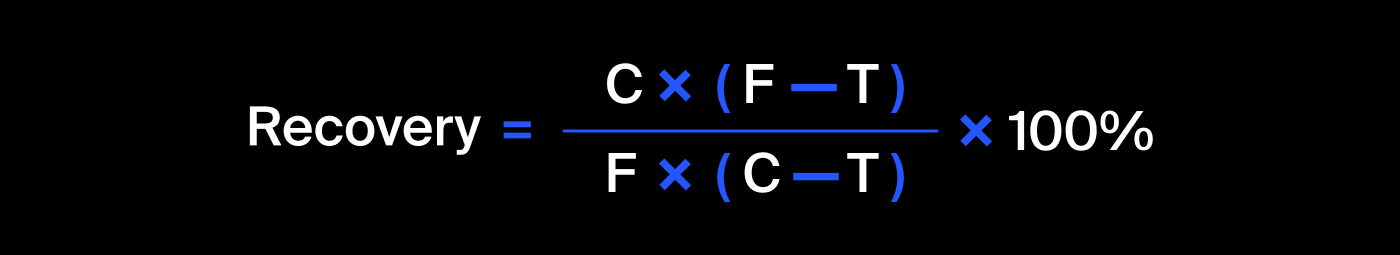

In [13]:
df_train['rougher.output.recovery'].isnull().sum()

0

In [14]:
df_train['rougher.output.recovery'].astype(bool).sum(axis=0)

13852

In [15]:
c,f,t = df_train['rougher.output.concentrate_au'], df_train['rougher.input.feed_au'], df_train['rougher.output.tail_au']

profit = recovery(c,f,t)
correct_values = df_train['rougher.output.recovery'] == profit
print('Совпадающих значений:', correct_values.sum(), 'из', df_train['rougher.output.recovery'].count())
print('MAE:', mean_absolute_error(profit, df_train['rougher.output.recovery']))

Совпадающих значений: 6671 из 14149
MAE: 9.682896147825551e-15


МАЕ достаточно низкий, а значит расчеты recovery произведены верно.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
Отлично, есть контакт)

Общая база и тестовая выборка - отличаются по параметрам. Найдем признаки, недоступные в тестовой выборке.

In [16]:
df_train.columns.shape , df_test.columns.shape

((87,), (53,))

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null datetime64[ns]
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant     

In [18]:
importnat_columns =  df_train.columns.difference(df_test.columns)
importnat_columns.tolist()

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Проанализировав отсутствующие значения в тестовой выборке видим, что в ней не хватает столбцов со значениями характристики металлов на разных этапах обработки. На всех этапах отсутствует информация о хвостовых частях.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
В общем, да, 
В тестовой выборке недоступны некоторые расчетные (calculation) и выходные (output) характеристики процесса, т.к. их невозможно получить/измерить во время выполнения технологического процесса. 

## Анализ данных

Посмотрим, как меняется концентрация металлов concentrate_(Au, Ag, Pb) на различных этапах очистки. Для этого построим графики для всех  этапов, включая исходные показатели сырья (input.feed): 

    rougher — флотация
    primary_cleaner — первичная очистка
    final — финальные характеристики

In [19]:
au_concentrate = df_train[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]
ag_concentrate = df_train[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
pb_concentrate = df_train[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]

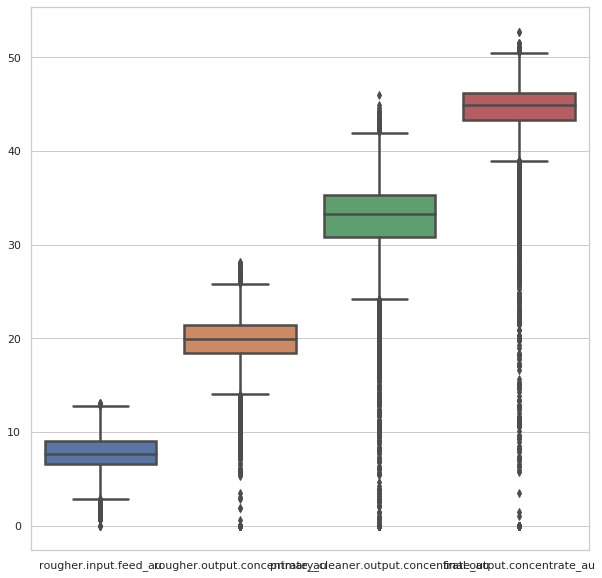

In [20]:
sns.set(style="whitegrid")
sns.set_context(font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(10, 10))
sns.boxplot( linewidth=2.5, data=au_concentrate )

In [21]:
def charts(data):
    sns.set(style="whitegrid")
    sns.set_context(font_scale=1.5, rc={"lines.linewidth": 2.5})
    plt.subplots(figsize=(10, 10))
    plt.xticks(rotation=90)
    return sns.boxplot( linewidth=2.5, data=data)

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


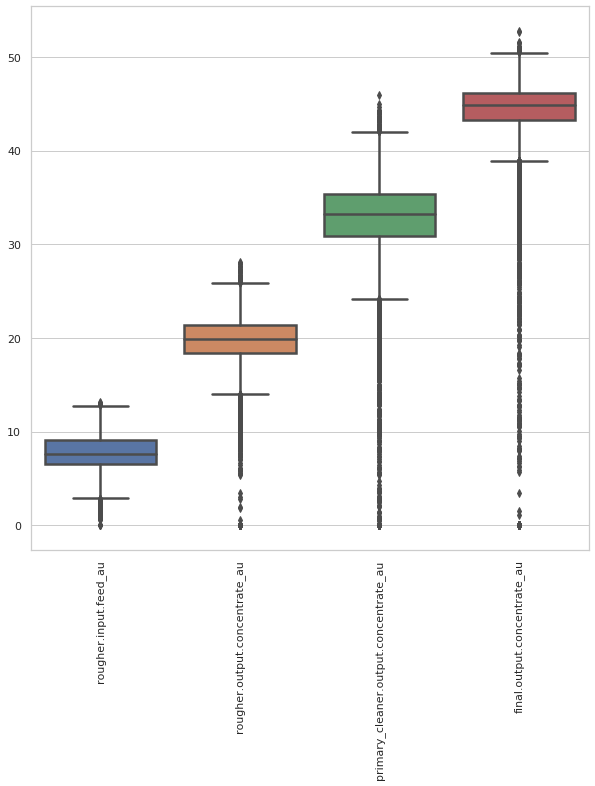

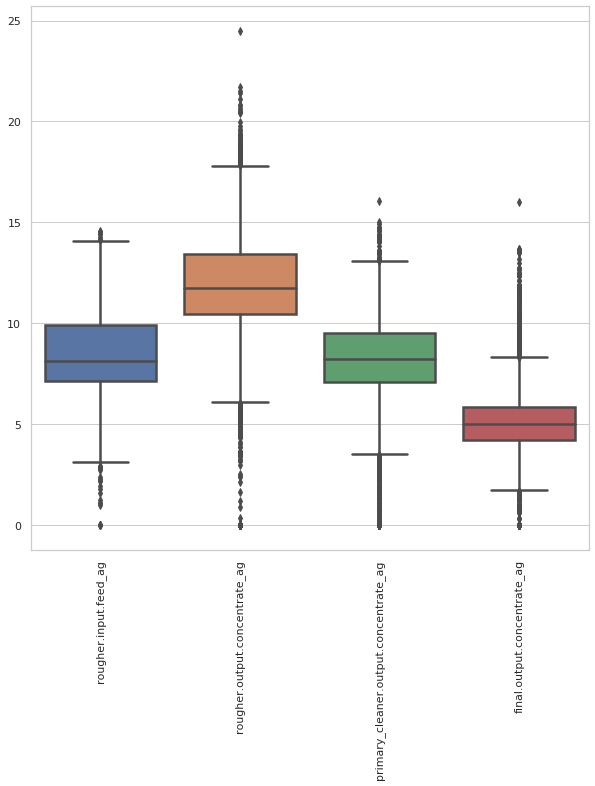

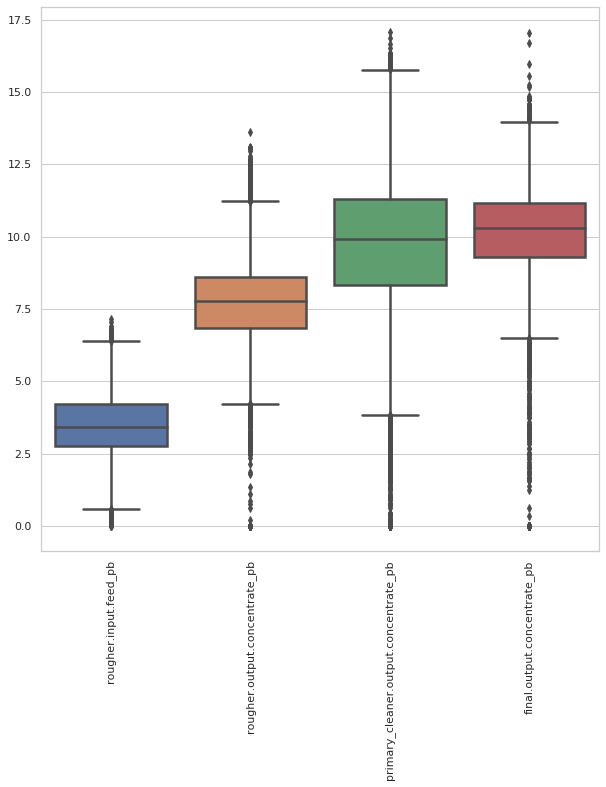

In [22]:
print(charts(au_concentrate),charts(ag_concentrate),charts(pb_concentrate))

    1) Анализируя концентрацию золота, можно заметить, что на каждом этапе очистки происходит плавномерное увеличение показателей, что приводит к максимальным показателям к финальному этапу.
    2) При анализе концентрации серебра, видим, что наибольшее значение оно получает при флотации продукта.
    3) При анализе концентрации свинца, видим, что значения после перового этапа сильно возрастают, по сравнению с сырым продуктом, но динамика резко замедляется и на последнем этапе не так заметна.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
КЛАССНО, удобный графический анализ. И видно, что золотишко растёт - и это хорошо, кому-то). Серебро падает - это логично, мы же производим золоот)<br>
А свинец - побочное дитя химических реакций, поэтому не много увеличивается его содержание)

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [23]:
feed_size_train = df_train['rougher.input.feed_size']
feed_size_test = df_test['rougher.input.feed_size']

In [24]:
feed_size_train.describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [25]:
feed_size_test.describe()

count    5856.000000
mean       55.898866
std        22.707969
min         0.046369
25%        43.852884
50%        49.964796
75%        61.628003
max       477.445473
Name: rougher.input.feed_size, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


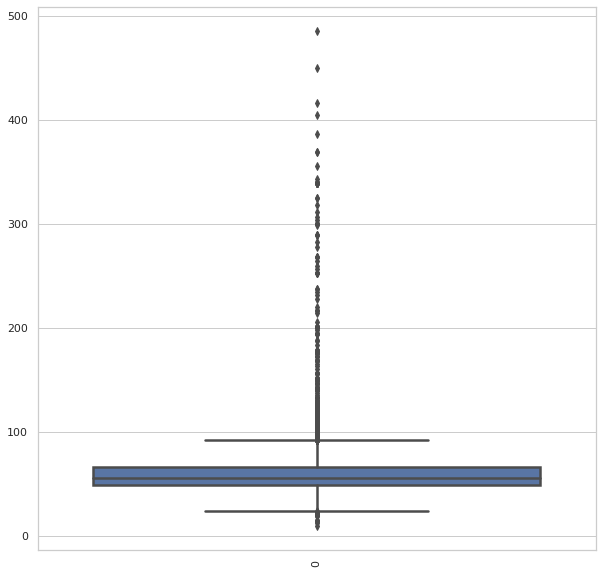

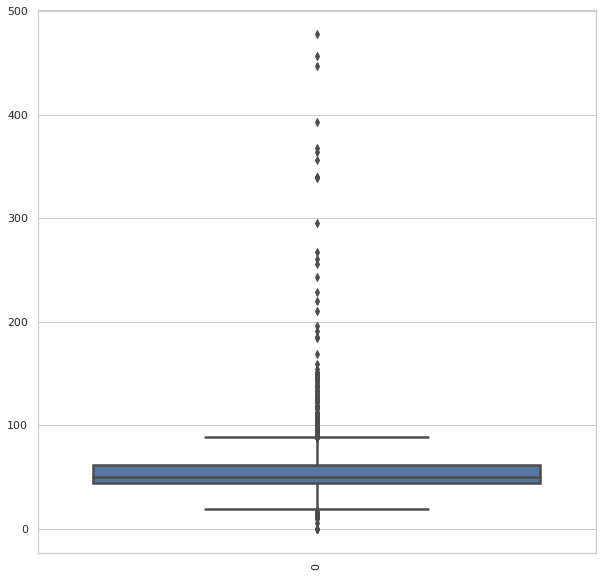

In [26]:
print(charts(feed_size_train), charts(feed_size_test))

(0, 100)

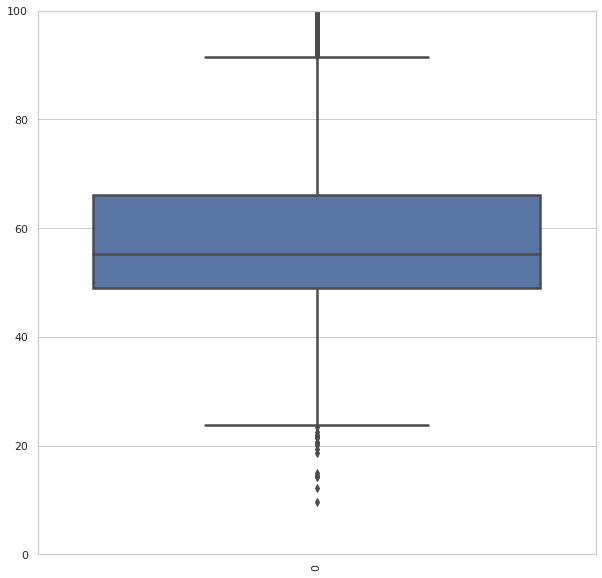

In [27]:
charts(feed_size_train)
plt.ylim(0,100)

(0, 100)

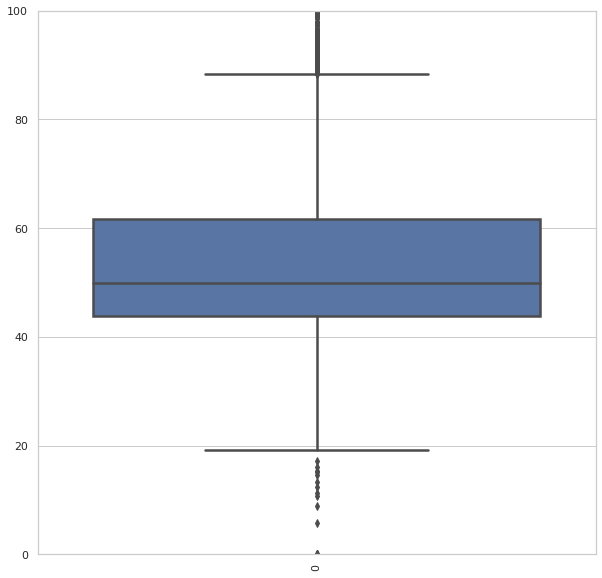

In [28]:
charts(feed_size_test)
plt.ylim(0,100)

По данным графиков распределения и описательным показаниям видно, что тестовые и обучающие выборки примерно одинаковые.Видно, что усы распределяются практически одинаково, а показатели медиан 50 и 55 ~ близки друг к другу.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
ок, принято)

**Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

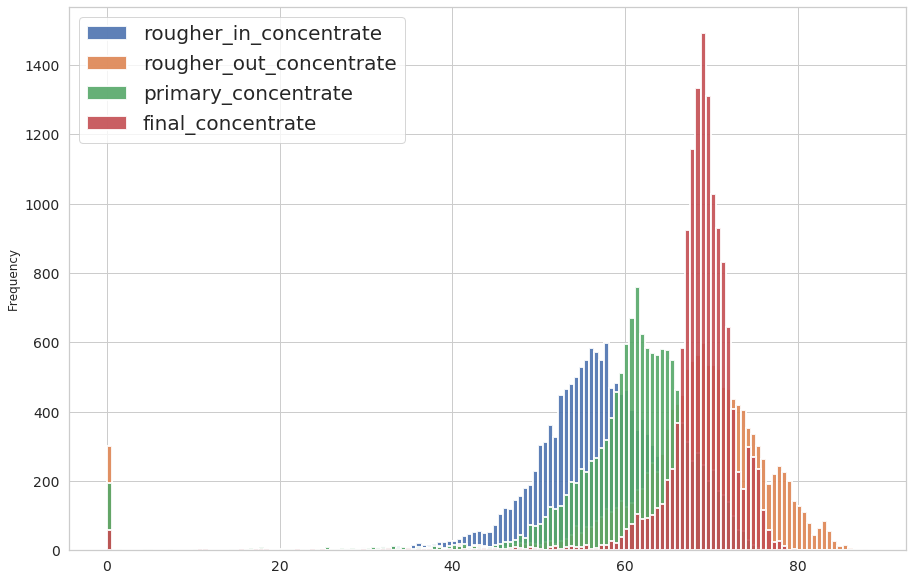

In [29]:
df_concentrate = pd.DataFrame()

df_concentrate['rougher_in_concentrate'] = df_train[['rougher.input.feed_au','rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)
df_concentrate['rougher_out_concentrate'] = df_train[['rougher.output.concentrate_au','rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)
df_concentrate['primary_concentrate'] = df_train[['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']].sum(axis=1)
df_concentrate['final_concentrate'] = df_train[['final.output.concentrate_au','final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']].sum(axis=1)

df_concentrate.plot(figsize = (15,10), sharey=True, linewidth=2, fontsize=14, stacked = False, kind = 'hist', alpha = 0.9, bins = 150).legend(loc=2, prop={'size': 20})



Значения распределений концентрация примерно одинаковые и распределены нормально, однако на этапе "primary_concentrate" и, особенно, на "final_concentrate" заметен сильный выброс данных. Посмотрим на распределение показаний через boxplot. И сразу обратив внмание, что у нас очень большое количество 0 значений.

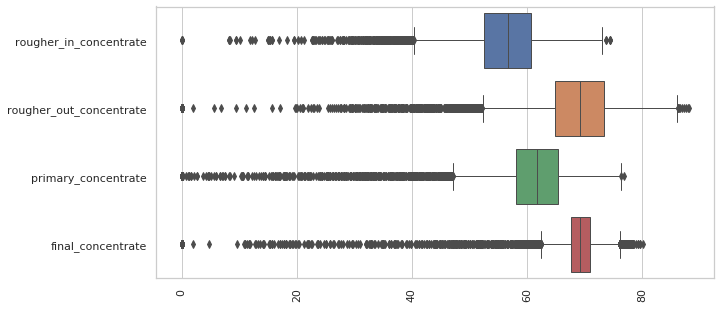

In [30]:
sns.set(style="whitegrid")
sns.set_context(font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(10, 5))
plt.xticks(rotation=90)
sns.boxplot(orient="h", linewidth=1, data=df_concentrate)

На графике размаха сразу бросается в глаза большое количество выбросов по всем показаниям концентранции металлов, преимущественно в отрицательную сторону, близкую к нулю. Это не является аномалией, поскольку концентрация всегда разная, однако стоит обратить внимание на "primary_concentrate", у него гораздо больше низких показателей коэффициентов.

In [31]:
df_train['rougher.input.feed_au'].shape,df_train['primary_cleaner.output.concentrate_au'].shape,df_train['primary_cleaner.output.concentrate_ag'].shape,df_train['final.output.concentrate_au'].shape,

((14149,), (14149,), (14149,), (14149,))

In [32]:
#удалим нулевые показатели
df_train = df_train.drop(index = df_train[df_train["rougher.input.feed_au"] < 1].index,
                               axis = 0)
df_train = df_train.drop(index = df_train[df_train["rougher.input.feed_ag"] < 1].index,
                               axis = 0)
df_train = df_train.drop(index = df_train[df_train["rougher.input.feed_pb"] < 1].index,
                               axis = 0)
df_train = df_train.drop(index = df_train[df_train["rougher.input.feed_sol"] < 1].index,
                               axis = 0)


df_train = df_train.drop(index = df_train[df_train["rougher.output.concentrate_au"] < 1].index,
                               axis = 0)
df_train = df_train.drop(index = df_train[df_train["rougher.output.concentrate_ag"] < 1].index,
                               axis = 0)
df_train = df_train.drop(index = df_train[df_train["rougher.output.concentrate_pb"] < 1].index,
                               axis = 0)
df_train = df_train.drop(index = df_train[df_train["rougher.output.concentrate_sol"] < 1].index,
                               axis = 0)

df_train = df_train.drop(index = df_train[df_train["primary_cleaner.output.concentrate_au"] < 1].index,
                               axis = 0)
df_train = df_train.drop(index = df_train[df_train["primary_cleaner.output.concentrate_ag"] < 1].index,
                               axis = 0)
df_train = df_train.drop(index = df_train[df_train["primary_cleaner.output.concentrate_pb"] < 1].index,
                               axis = 0)
df_train = df_train.drop(index = df_train[df_train["primary_cleaner.output.concentrate_sol"] < 1].index,
                               axis = 0)

df_train = df_train.drop(index = df_train[df_train["final.output.concentrate_au"] < 1].index,
                               axis = 0)
df_train = df_train.drop(index = df_train[df_train["final.output.concentrate_ag"] < 1].index,
                               axis = 0)
df_train = df_train.drop(index = df_train[df_train["final.output.concentrate_pb"] < 1].index,
                               axis = 0)
df_train = df_train.drop(index = df_train[df_train["final.output.concentrate_sol"] < 1].index,
                               axis = 0)


In [33]:
df_train['final.output.concentrate_au'].shape

(13304,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5df3fd150>,
      dtype=object)

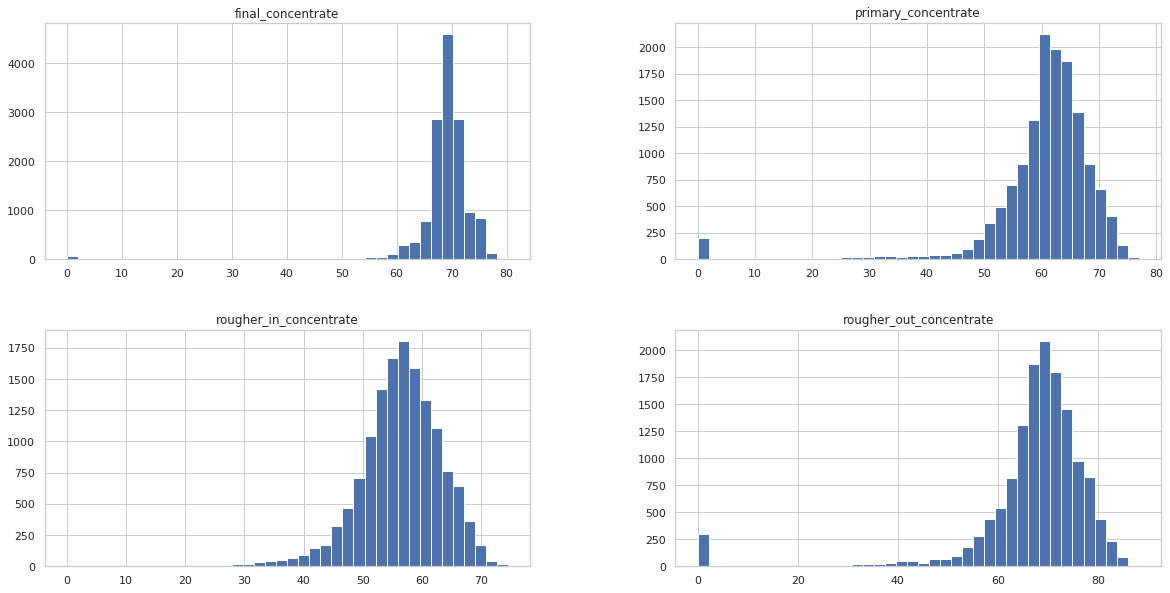

In [34]:
df_concentrate.hist(bins = 40,figsize = (20,10))

Видим, что после очистки все графики распределены нормально. Никаких дополнительных отклонений нет и можно приступить к обучению модели. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
ОК, отлично! Ещё пару строк по выбросам: в некоторых проектах - это важно, избавиться от выбросов<br>

И вот если обратиться к нашему проекту:<br>
1) Есть нулевые аномалии в суммарных концентрациях - и их надо "убить". Дело в том, что предполагается, что хоть грамм чего-нибудь но есть в руде. А если мы имеем ноль, значит большая вероятность неточности измерений.<br>
    
2)А вот с выбросами как в приниципе..<br>
Тут на обсуждение: наша цель - предсказывать модель на реальных данных. И вот эти выбросы - это и есть реальная концентрация. И нам важно, чтобы модель умела и их тоже видеть и обрабатывать. Если их убрать из модели, то получится, что у нас она станет как бы искусственной. Т.е. будет работать только в небольших диапазонах - потому что обучалась только в них.<br>
    
Поэтому, тут так: выбросы - это не всегда то, от чего надо избавляться))) Ещё зависит от бизнес-задачи.<br>
    
Кстати<br>
если говорить о теории выбросов с помощью графика "ящик с усами", то вот это интервал q3+-1.5*iqr говорит действильно о них самых<br>
Но нет рекоммендаций к их удалению. Говорят так "на усмотрение бизнеса".<br>
А вот если взять вот этот интервал q3+3*iqr:  то тут уж с очень высокой вероятность можно говорить о грубых выбросах.

## Модель

Напишем функцию для вычисления итоговой sMAPE.

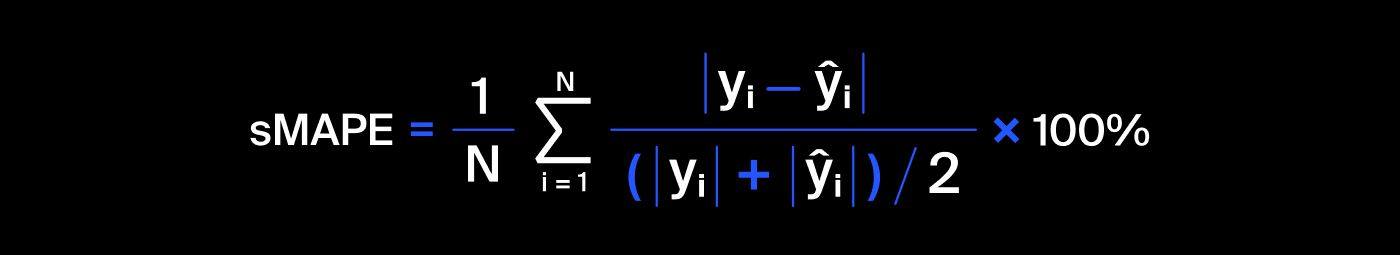

Обозначения: 
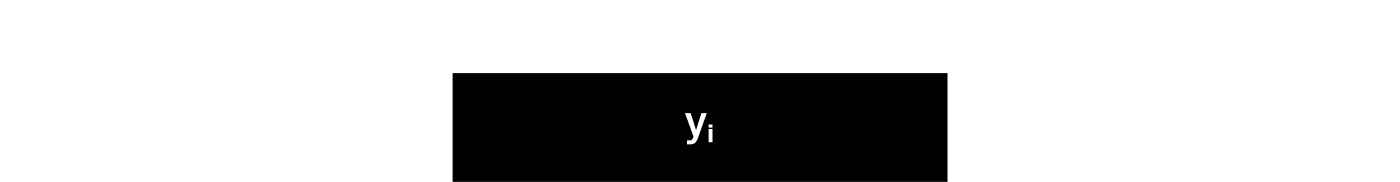

    Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.
    
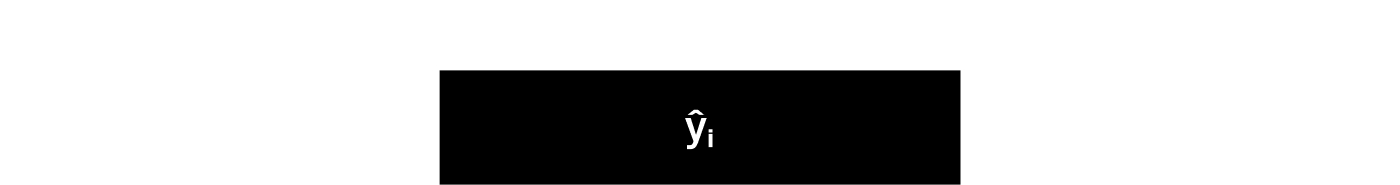

    Значение предсказания для объекта с порядковым номером i, например, в тестовой выборке.
    
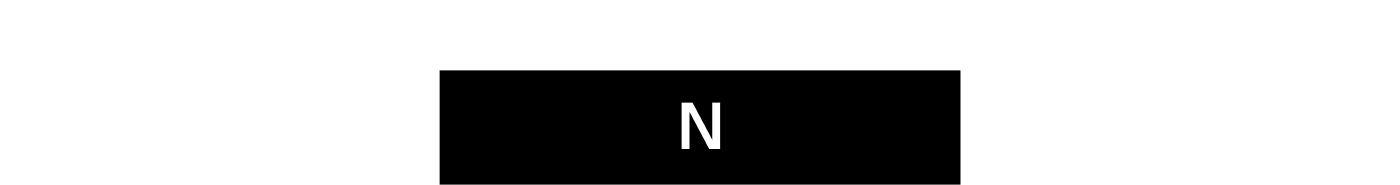

    Количество объектов в выборке.
    
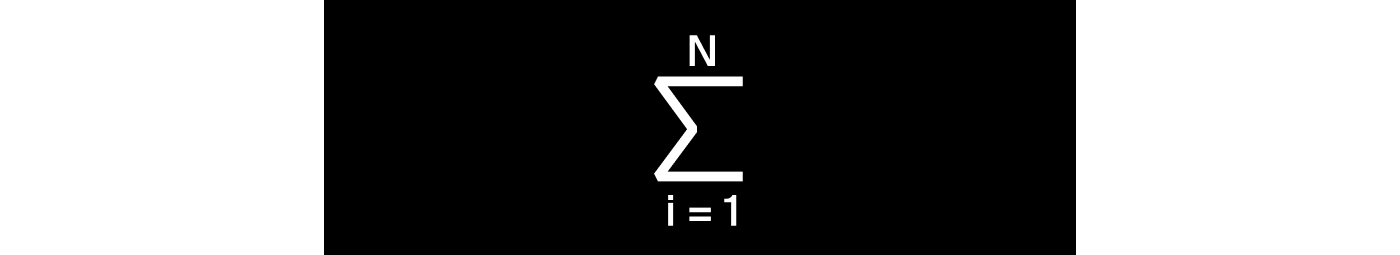

    Суммирование по всем объектам выборки (i меняется от 1 до N).

In [35]:
def smape(df_true,df_pred):
    smape = np.mean(abs(df_true - df_pred)/((abs(df_true)+abs(df_pred))/2))*100
    return smape

Итоговая sMAPE:
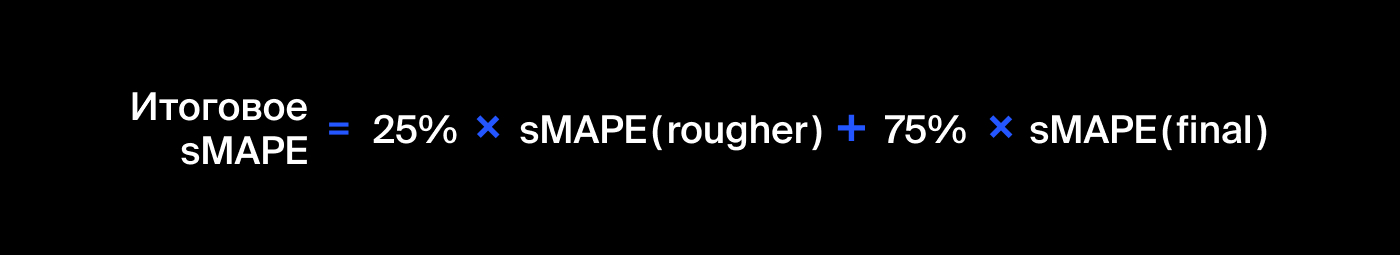

In [36]:
def total_smape(smape_rougher,smape_final):
    return (0.25*smape_rougher + 0.75*smape_final)

Обучим разные модели и оценим их качество кросс-валидацией, постараясь найти лучшую модель для проверки на тестовой выборке.

In [37]:
#зададим новый параметр качества
new_score = make_scorer(smape, greater_is_better=False)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>С формулами - ОК.

In [38]:
#удалим лишний столбец даты и промасштабируем

df_train = df_train.drop('date', axis =1)

scaler = StandardScaler() 
scaler.fit(df_train)
trnsform_scaled = scaler.transform(df_train)

# Определение датафрэйма признаков стандаризаций
df_train_scaled = pd.DataFrame(trnsform_scaled, index=df_train.index , 
                               columns=df_train.columns )

df_train_scaled.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,0.678885,-0.226260,-1.350274,-0.551844,0.399834,0.342894,-1.790866,2.150709,-0.900653,-0.207244,...,-1.055586,-0.481022,-0.643167,-0.766065,-1.172671,-0.387520,-0.860680,-0.434104,-0.954373,-2.666066
1,0.659192,-0.172159,-1.440384,-0.413666,0.257567,0.365166,-1.757469,2.059700,-0.807803,-0.245561,...,-1.059933,-0.540123,-0.671452,-0.708292,-1.153207,-0.435895,-0.877146,-0.436932,-0.981003,-2.503098
2,0.679281,-0.004970,-1.394894,-0.425631,0.129276,0.384652,-1.730062,1.916104,-0.770384,-0.292959,...,-1.055908,-0.481667,-0.678599,-0.704909,-1.147782,-0.434833,-0.872094,-0.435289,-0.975727,-2.547244
3,0.673268,-0.166650,-1.584516,-0.416868,0.155062,0.347637,-1.803059,2.025399,-0.896452,-0.333551,...,-1.052103,-0.449059,-0.662172,-0.705939,-1.165008,-0.410707,-0.878435,-0.428632,-0.979750,-2.508722
4,0.749381,-0.053741,-1.555346,-0.394005,-0.003442,0.320208,-1.897951,2.022987,-1.000401,-0.445719,...,-1.053734,-0.429093,-0.670972,-0.703553,-1.172658,-0.475348,-0.892849,-0.431179,-0.981300,-2.549110


In [39]:
#зафиксируем значения для модели, удалив значения, отсутствующие в тестовой выборке
features_train = df_train.drop(importnat_columns, axis = 1)
target_train_rouger = df_train['rougher.output.recovery']
target_train_final = df_train['final.output.recovery']


In [40]:
features_train.shape

(13304, 52)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>ОК, это важно было сделать трайн таким же как тест по количеству столбцов.

In [41]:
param_RDR = {"max_depth":range(1,31,10), "n_estimators":range(1,10)}
param_DTR = {"max_depth":range(1,31,10)}


In [42]:
#rouger_DTR
model_grid_rouger_DTR = GridSearchCV(DecisionTreeRegressor(random_state = 12345),param_DTR, cv = 5, scoring = new_score)

rouger_DTR = model_grid_rouger_DTR.fit(features_train, target_train_rouger)

print("Параметр глубины дерева лучшей модели: {}".format(model_grid_rouger_DTR.best_params_))
print("Лучший показатель sMape: {}".format(rouger_DTR.best_score_))

Параметр глубины дерева лучшей модели: {'max_depth': 1}
Лучший показатель sMape: -7.805078410961468


In [43]:
#final_DTR
model_grid_final_DTR = GridSearchCV(DecisionTreeRegressor(random_state = 12345),param_DTR, cv = 5, scoring = new_score)

final_DTR = model_grid_final_DTR.fit(features_train, target_train_final)

print("Параметр глубины дерева лучшей модели: {}".format(model_grid_final_DTR.best_params_))
print("Лучший показатель sMape: {}".format(final_DTR.best_score_))

Параметр глубины дерева лучшей модели: {'max_depth': 1}
Лучший показатель sMape: -9.200518884662483


In [44]:
#rouger_RDR
model_grid_rouger_RDR = GridSearchCV(RandomForestRegressor(random_state = 12345),param_RDR, cv = 5, scoring = new_score)

rouger_RDR = model_grid_rouger_RDR.fit(features_train, target_train_rouger)

print("Параметр глубины дерева и количества лучшей модели: {}".format(model_grid_rouger_RDR.best_params_))
print("Лучший показатель sMape: {}".format(rouger_RDR.best_score_))

Параметр глубины дерева и количества лучшей модели: {'max_depth': 11, 'n_estimators': 9}
Лучший показатель sMape: -6.794430565325073


In [45]:
#final_RDR
model_grid_final_RDR = GridSearchCV(RandomForestRegressor(random_state = 12345),param_RDR, cv = 5, scoring = new_score)

final_RDR = model_grid_final_RDR.fit(features_train, target_train_final)

print("Параметр глубины дерева и количества лучшей модели: {}".format(model_grid_final_RDR.best_params_))
print("Лучший показатель sMape: {}".format(final_RDR.best_score_))

Параметр глубины дерева и количества лучшей модели: {'max_depth': 1, 'n_estimators': 6}
Лучший показатель sMape: -9.171194365746837


По показателям модели видим, что лучше всего себя показывает RandomForestRegressor с показателями модели: {'max_depth': 11, 'n_estimators': 9} , поэтому возьмем их для расчета итоговой sMAPE:

In [46]:
print('Итоговая sMAPE RandomForestRegressor:', total_smape(rouger_RDR.best_score_ , final_RDR.best_score_))
print('Итоговая sMAPE DecisionTreeRegressor:', total_smape(rouger_DTR.best_score_ , final_DTR.best_score_))

Итоговая sMAPE RandomForestRegressor: -8.577003415641396
Итоговая sMAPE DecisionTreeRegressor: -8.851658766237229


Проверим качество модели на тестовой выборке c данными лучших моделей, предварительно перетащив целевые столбцы по индексу из df_full:

In [43]:
df_full_for_test = df_full[['date','rougher.output.recovery','final.output.recovery']]
df_new_test = df_test.merge(df_full_for_test,  on='date', how='left')



Видим, что не цепляется несколько значений, но относительно общей базы их немного ,поэтому можно удалить их

In [44]:
df_new_test = df_new_test.dropna()

In [45]:
df_new_test = df_new_test.drop('date', axis = 1)

In [46]:
target_test_rougher = df_new_test['rougher.output.recovery']
target_test_final = df_new_test['final.output.recovery']
df_test = df_new_test.drop(['rougher.output.recovery','final.output.recovery'], axis = 1)

In [ ]:
rougher_pred_test = model_grid_rouger_RDR.predict(df_test)
final_pred_test = model_grid_final_RDR.predict(df_test)

rougher_test_smape = smape(target_test_rougher,rougher_pred_test)
final_test_smape = smape(target_test_final,final_pred_test)

In [52]:
print('sMAPE rouger тестовой выборки:', rougher_test_smape)
print('sMAPE final тестовой выборки:', final_test_smape)
print('Итоговая sMAPE тестовой выборки:',total_smape(rougher_test_smape, final_test_smape))

sMAPE rouger тестовой выборки: 8.369081603722407
sMAPE final тестовой выборки: 9.55820771553914
Итоговая sMAPE тестовой выборки: 9.260926187584957


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
Александр, интересную работу ты провёл.<br>
Понятно, логично, вдумчиво<br>
Видна хорошая предвариателная работа с данными, уместный графический анализ, осмысленная аналитика и дельная модельная работа - многое удалось как надо)<br>
    
Метрика - достаточно низкая. И это хорошо.<br>
вот только не понятно насколько))<br>
По хорошему, здесь надо понять: наша модель предсказывает лучше, чем просто по среднему.<br>
Например, в формулу метрики предиктом подставить медианные значения таргет-трайна). <br>
Или использовать DummyRegression<br>
<font color='red'>
Покажи, пожалуйста, сравнение и вывод относительно константной модели)
<font color='green'>    
Спасибо)<br>
БУДУ ЖДАТЬ КОММЕНТАРИЕВ!

<div     style = 'color: #FFFFFF;
    background-color: #3E94C9;
    border-color: #d6e9c6; padding: 15px;
    margin-bottom: 18px;
    border: 1px solid transparent;
    border-radius: 2px;'>
<h2> Ответ исполнителя :<a class="tocSkip"> </h2>

Добавил. Я её сделал и удалил, потому что не было в условиях :) 
</div>

In [53]:
model_dummy = DummyRegressor(strategy="median")

model_dummy.fit(features_train, target_train_rouger)
model_dummy.fit(features_train, target_train_final)

DummyRegressor(constant=None, quantile=None, strategy='median')

In [ ]:
**************

In [55]:
#model_dummy = DummyRegressor(strategy="median")

model_dummy1=DummyRegressor(strategy="median").fit(features_train, target_train_rouger)
model_dummy2=DummyRegressor(strategy="median").fit(features_train, target_train_final)

In [56]:
rougher_pred_dummy = model_dummy1.predict(df_test)
final_pred_dummy = model_dummy2.predict(df_test)

rougher_dummy_smape = smape(target_test_rougher,rougher_pred_dummy)
final_dummy_smape = smape(target_test_final,final_pred_dummy)

In [57]:
print('sMAPE rouger тестовой выборки:', rougher_dummy_smape)
print('sMAPE final тестовой выборки:', final_dummy_smape)
print('Итоговая sMAPE тестовой выборки:',total_smape(rougher_dummy_smape, final_dummy_smape))

sMAPE rouger тестовой выборки: 8.492344832688905
sMAPE final тестовой выборки: 9.728793441471751
Итоговая sMAPE тестовой выборки: 9.41968128927604


При тестировании модели фиктивных элементов можно обратить внимание на то, что основной показатель sMAPE ухудшился в несколько раз, преимущественно за счет sMAPE rouger, что сильно повлияло на итоговый оценку sMAPE тестовой выборки.  Это говорит о том, что наша модель работает лучше, чем константная модель.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u>
<font color='green'><br>
Привет, Александр. ОК, увидел твои доработки, спаисбо.<br>
По константной: посмотри, пожалуйста код в ******. Там я чуть изменил запись самой модели - теперь всё ок считает)<br><br>
    
И видно, что разница средних метрик между нашей моедлью и константной - совсем не большая. Но тут сложно говорить кто лучше/хуже ...(по идее, если хотим точно выяснить - надо испрользовать проверку гипотез мз спринта 4, т.е. сраниваем средние с учётом разброса данных)
На мой взгляд метрики - примерно одинаковые. И это допустимо в этом проекте). Что же тогда ещё для дальнейшего улучшения качества моделирования возможно сделать?<br>    

Попробовал систематизировать:<br>
1) качество данных на входе: ещё раз оценить аномалии, пропуски, соответствие физике (правдиво ли всё)<br>
2) Работа с моделями:<br>
- Генерация и поиск бизнес-факторов для моделирования: возможно что-то упустили, или придумать что-то гибридное из имеющихся факторов... В общем ещё раз пройтись по бизнес-цепочке процесса<br>
- Подбор самих моделей. показателей самих моделей <br>
- Подбор параметров выбранных показателей у выбранных моделей <br>
    
3)Плюс, есть же ещё параметры самого процесса: температура, скорость конвейера, сила удара чего-то там....<br> Они тоже могут помочь<br>
4) ну и разобраться ещё раз с физическими и производственными процессами. ВОзможно приниципиально иное решение можно создать.<br> 
    
В общем-то другого и нет. Только такие возможности.<br>
Если углубится в так называемый "Статистический анализ данных" (SPC) - по сути это превариетльная подготовка данных в этом проекте, можно найти какое-нибудь решение<br>

Но цель проекта достигнута:<br>
1) пройдены важные этапы построения производственной модели<br>
2) возникло много дополнительных вопросов))

Спасибо за работу) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке